In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout
from keras.datasets import cifar10

In [2]:
def residual_block(filters):
  '''Define a residual block'''
  model=Sequential()
  model.add(Conv2D(filters,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(filters,(3,3),padding='same',activation='relu'))

  return model

In [3]:
def build_resnet(depth):
  '''Defines a resnet model with the specified depth'''
  model=Sequential()
  model.add(Conv2D(64,(7,7),padding='same',activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D((3,3),strides=(2,2)))

  for i in range(depth -2):
    model.add(residual_block(64))

  model.add(Conv2D(10,(1,1),padding='same',activation='relu'))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))

  return model

In [13]:
model=build_resnet(15)

In [14]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 sequential_30 (Sequential)  (None, 15, 15, 64)        73856     
                                                                 
 sequential_31 (Sequential)  (None, 15, 15, 64)        73856     
                                                                 
 sequential_32 (Sequential)  (None, 15, 15, 64)        73856     
                                                                 
 sequential_33 (Sequential)  (None, 15, 15, 64)        73856     
                                                     

In [15]:
from keras.utils import plot_model

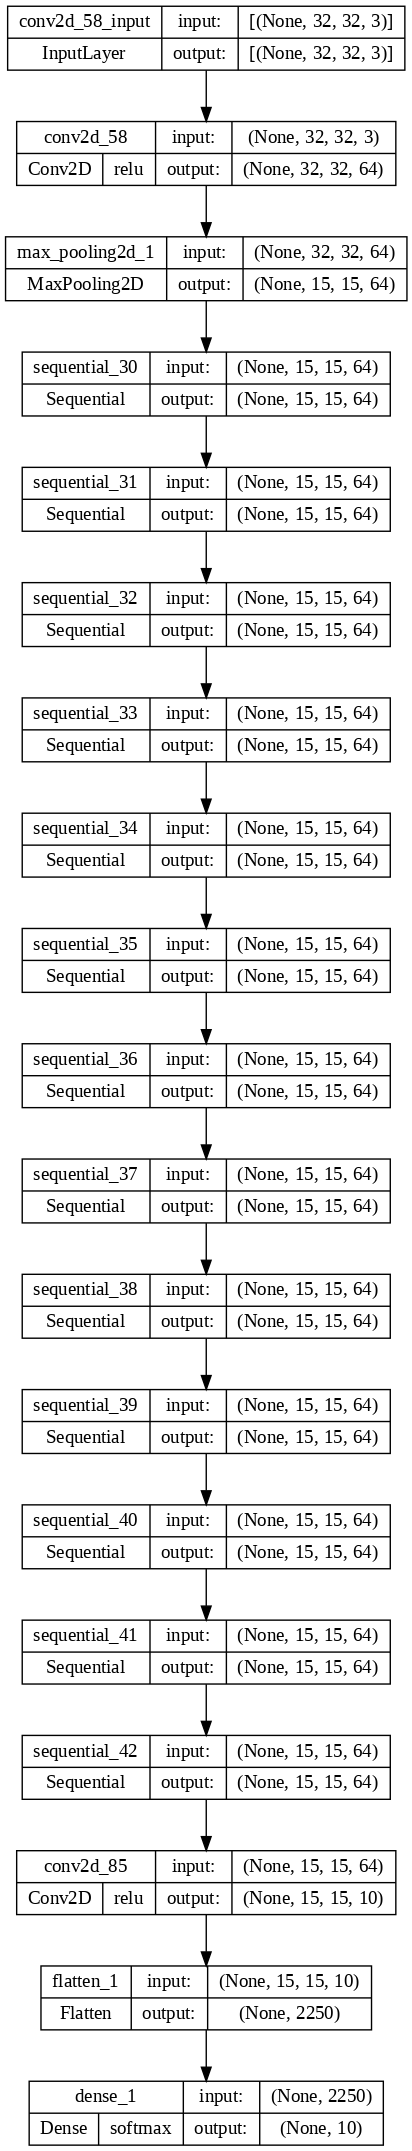

In [16]:
plot_model(model,show_layer_activations=True, show_shapes=True, show_layer_names=True,dpi=100)

In [17]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train= x_train.reshape(x_train.shape[0],32,32,3)
x_test= x_test.reshape(x_test.shape[0],32,32,3)

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 17ms/step - loss: 2.3058 - accuracy: 0.0992
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 2.3028 - accuracy: 0.0966
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3028 - accuracy: 0.0964
Epoch 5/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3028 - accuracy: 0.0967
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3028 - accuracy: 0.1004
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3028 - accuracy: 0.0988
Epoch 8/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3028 - accuracy: 0.0981
Epoch 9/10
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 10/10
1563/1563 [==============================] - 26s 16m

In [21]:
model.evaluate(x_test,y_test,batch_size=1)

10000/10000 [==============================] - 37s 4ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026273250579834, 0.10000000149011612]